### Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Loading the Data

In [3]:
dataset = pd.read_csv('apy.csv')
print(dataset.keys())

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')


### Metadata - List of Crops

In [4]:
description = {'Rajmash Kholar': 0, 'Other Fresh Fruits': 1, 'Rubber': 2, 'Niger seed': 3, 'Grapes': 4, 'Ber': 5, 
               'Water Melon': 6, 'Snak Guard': 7, 'Beet Root': 8, 'Ash Gourd': 9, 'Other Dry Fruit': 10, 'Onion': 11, 
               'Moth': 12, 'Pineapple': 13, 'Dry ginger': 14, 'Black pepper': 15, 'Ribed Guard': 16, 'Brinjal': 17, 
               'Citrus Fruit': 18, 'Turmeric': 19, 'other misc. pulses': 20, 'Carrot': 21, 'Khesari': 22, 'Potato': 23, 
               'Rice': 24, 'Tomato': 25, 'Other  Rabi pulses': 26, 'Pear': 27, 'Kapas': 28, 'Sweet potato': 29, 'Jowar': 30, 
               'Bajra': 31, 'Paddy': 32, 'Ricebean (nagadal)': 33, 'Castor seed': 34, 'Tea': 35, 'Plums': 36, 
               'Other Kharif pulses': 37, 'Peas & beans (Pulses)': 38, 'Arcanut (Processed)': 39, 'Pulses total': 40, 
               'Jute & mesta': 41, 'Moong(Green Gram)': 42, 'Wheat': 43, 'Beans & Mutter(Vegetable)': 44, 'Banana': 45, 
               'other oilseeds': 46, 'Perilla': 47, 'Urad': 48, 'Pome Fruit': 49, 'Lemon': 50, 'Masoor': 51, 'Korra': 52, 
               'Barley': 53, 'Rapeseed &Mustard': 54, 'Cowpea(Lobia)': 55, 'Litchi': 56, 'Sannhamp': 57, 'Lentil': 58, 
               'Maize': 59, 'Bitter Gourd': 60, 'Other Vegetables': 61, 'Arecanut': 62, 'Cucumber': 63, 'Cardamom': 64, 
               'Orange': 65, 'Apple': 66, 'Papaya': 67, 'Coffee': 68, 'Cotton(lint)': 69, 'Cashewnut Processed': 70, 
               'Pome Granet': 71, 'Sesamum': 72, 'Yam': 73, 'Peach': 74, 'Sapota': 75, 'Colocosia': 76, 'Jobster': 77, 
               'Coconut ': 78, 'Atcanut (Raw)': 79, 'Other Citrus Fruit': 80, 'Peas  (vegetable)': 81, 'Groundnut': 82, 
               'Jute': 83, 'Cabbage': 84, 'Bottle Gourd': 85, 'Gram': 86, 'Soyabean': 87, 'Redish': 88, 'Jack Fruit': 89, 
               'Small millets': 90, 'Pump Kin': 91, 'Mesta': 92, 'Mango': 93, 'Varagu': 94, 'Ginger': 95, 'Horse-gram': 96, 
               'Tapioca': 97, 'Dry chillies': 98, 'Cashewnut': 99, 'Samai': 100, 'Safflower': 101, 'Sunflower': 102, 
               'Guar seed': 103, 'Arhar/Tur': 104, 'Cond-spcs other': 105, 'Cashewnut Raw': 106, 'Turnip': 107, 
               'Lab-Lab': 108, 'Blackgram': 109, 'Garlic': 110, 'Sugarcane': 111, 'Tobacco': 112, 'Other Cereals & Millets': 113, 
               'Bean': 114, 'Ragi': 115, 'Cauliflower': 116, 'Coriander': 117, 'Linseed': 118, 'other fibres': 119, 
               'Total foodgrain': 120, 'Oilseeds total': 121, 'Drum Stick': 122, 'Bhindi': 123}

### Data Preprocessing

In [5]:
def vectorize_season(num):
    one_hot = np.zeros(6,dtype=int)
    one_hot[int(num)]=1
    return one_hot
def vectorize_crops(num):
    one_hot = np.zeros(124,dtype=int)
    one_hot[int(num)]=1
    return one_hot
    
list_of_season = {"Kharif":0,"Whole Year":1,"Autumn":2,"Rabi":3,"Winter":4,"Summer":5}
crops = dataset["Crop"].values
seasons = dataset['Season'].values
data_list = []
for i in seasons:
    data_list.append(i.strip())
seasons = np.array(data_list)
#Categorical Encoding seasons
for i in list_of_season:
    seasons[seasons==i] = int(list_of_season[i])
#One-Hot Encoding seasons
encoded_seasons = []
for i in seasons:
    encoded_seasons.append(vectorize_season(i))
encoded_seasons = np.array(encoded_seasons)
#Categorical Encoding seasons
for i in description:
    crops[crops==i] = description[i]
#One-Hot Encoding seasons
encoded_crops = []
for i in seasons:
    encoded_crops.append(vectorize_crops(i))
encoded_crops = np.array(encoded_crops)
loaded_data = dataset.iloc[:,2:].values
loaded_data[:,1]=seasons
loaded_data[:,2]=crops
int_list_season=[]
for i in loaded_data[:,1]:
    int_list_season.append(int(i))
loaded_data[:,1] = int_list_season
print(loaded_data[:10])
from sklearn.model_selection import train_test_split
features = loaded_data[:,:-1]
target = loaded_data[:,-1]
updated_target=[]
for i in target:
    try:
        updated_target.append(int(i))
    except:
        updated_target.append(600)
X_train,X_test,y_train,y_test=train_test_split(features,updated_target,test_size = 0.2)
y_train = np.array(y_train)
y_test = np.array(y_test)

[[2000 0 62 1254.0 2000.0]
 [2000 0 37 2.0 1.0]
 [2000 0 24 102.0 321.0]
 [2000 1 45 176.0 641.0]
 [2000 1 99 720.0 165.0]
 [2000 1 78 18168.0 65100000.0]
 [2000 1 14 36.0 100.0]
 [2000 1 111 1.0 2.0]
 [2000 1 29 5.0 15.0]
 [2000 1 97 40.0 169.0]]


### Training Random Forest Model

In [6]:
from sklearn.ensemble import RandomForestRegressor as rfr
reg  = rfr(100)
reg.fit(X_train,y_train)
r_prediction = reg.predict(X_test)
print(r_prediction[:10])

[3.08671667e+02 1.21147619e+01 3.52533333e+01 5.82180000e+02
 1.13827000e+03 4.34700000e+02 4.30951812e+06 1.14692300e+04
 6.23870000e+02 7.52339683e+03]


### Evaluating the RandomForrestModel

In [7]:
from sklearn.metrics import mean_squared_error
random_for_error = mean_squared_error(y_test,r_prediction)

### Preprocessing for Deep learning

In [8]:
X_train,X_test,y_train,y_test=train_test_split(features,updated_target,test_size = 0.2)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train  = y_train.reshape(-1,1)
print(y_train[:10])
y_test  = y_test.reshape(-1,1)

print(len(y_test))
print(len(X_test))

[[4055]
 [  11]
 [4200]
 [  14]
 [  88]
 [1820]
 [  23]
 [ 114]
 [ 927]
 [ 358]]
49219
49219


### Building Neural Network

In [9]:
import tensorflow as tf
from tensorflow.keras import layers
def build_model():
    model = tf.keras.Sequential([
    layers.Flatten(),
    layers.Dense(150, activation=tf.nn.relu),
    layers.Dense(150, activation=tf.nn.relu),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
model = build_model()
history = model.fit(X_train, y_train, epochs=15,validation_split=0.3)

C:\Users\Admin\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\AppData\Roaming\Python\Python36\site-

Train on 137810 samples, validate on 59062 samples
Epoch 1/15
137810/137810 [==============================] - 17s 127us/step - loss: 319815909235641.2500 - mean_absolute_error: 672384.6831 - mean_squared_error: 319815909235641.2500 - val_loss: 212325724560915.7500 - val_mean_absolute_error: 539422.3104 - val_mean_squared_error: 212325724560915.7500
Epoch 2/15
137810/137810 [==============================] - 12s 85us/step - loss: 319697410813699.5625 - mean_absolute_error: 728125.5442 - mean_squared_error: 319697410813699.5625 - val_loss: 212280432567185.5000 - val_mean_absolute_error: 593652.4498 - val_mean_squared_error: 212280432567185.5000
Epoch 3/15
137810/137810 [==============================] - 12s 87us/step - loss: 319622860750202.1250 - mean_absolute_error: 773132.1903 - mean_squared_error: 319622860750202.1250 - val_loss: 212236388961494.6875 - val_mean_absolute_error: 635470.6988 - val_mean_squared_error: 212236388961494.6875
Epoch 4/15
137810/137810 [======================

### Evaluation of the Deep Learning Model

In [10]:
loss, mae, mse = model.evaluate(X_test, y_test)
print("mse",mse)
print("loss",loss)
print("mae",mae)

49219/49219 [==============================] - 2s 51us/step
mse 282833122199575.2
loss 282833122199575.2
mae 853814.191967279


### Comparision of Deep learning model and Random Forest Regressor

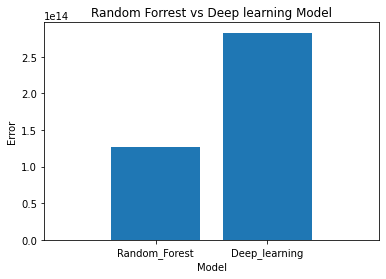

In [11]:
from matplotlib import pyplot as plt
x = ["Random_Forest","Deep_learning"]
y = [random_for_error,mse]
x2 = [6,9,11]
y2 = [6,15,7]
plt.bar(x, y, align='center')
plt.bar(x2, y2, color='g', align='center')
plt.title('Random Forrest vs Deep learning Model')
plt.xlim(-1,2)
plt.ylabel('Error')
plt.xlabel('Model')
plt.show()


### Fertilizer prediction and Evaluation

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
data = pd.read_csv("fer.csv")
data.head()
train_data = data.values[:,0:3]
train_target = data.values[:,3:]

In [16]:
import tensorflow as tf
from tensorflow.keras import layers
def build_model():
    model = tf.keras.Sequential([
    layers.Flatten(),
    layers.Dense(150, activation=tf.nn.relu),
    layers.Dense(150, activation=tf.nn.relu),
    layers.Dense(3)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
model = build_model()
history = model.fit(train_data, train_target, epochs=15,validation_split=0.3)

Train on 302 samples, validate on 130 samples
Epoch 1/15
302/302 [==============================] - 1s 3ms/step - loss: 3202.7156 - mean_absolute_error: 50.3130 - mean_squared_error: 3202.7156 - val_loss: 2713.6091 - val_mean_absolute_error: 45.9963 - val_mean_squared_error: 2713.6091
Epoch 2/15
302/302 [==============================] - 0s 202us/step - loss: 2517.2306 - mean_absolute_error: 43.7696 - mean_squared_error: 2517.2306 - val_loss: 1961.4760 - val_mean_absolute_error: 37.9789 - val_mean_squared_error: 1961.4760
Epoch 3/15
302/302 [==============================] - 0s 162us/step - loss: 1720.0222 - mean_absolute_error: 34.5394 - mean_squared_error: 1720.0222 - val_loss: 1137.4977 - val_mean_absolute_error: 26.8184 - val_mean_squared_error: 1137.4977
Epoch 4/15
302/302 [==============================] - 0s 179us/step - loss: 964.5002 - mean_absolute_error: 23.9631 - mean_squared_error: 964.5002 - val_loss: 543.7275 - val_mean_absolute_error: 17.5680 - val_mean_squared_error: 5

### Prediction based on User Input

In [14]:
def user_input_prediction(state_name,district_name,crop_year,season,crop,area):
    season = list_of_season[season]
    crop = description[crop]
    input_data = np.array([[crop_year,season,crop,area]])
    return model.predict(input_data)
print("production:",user_input_prediction("Andra Pradesh","CHITTOOR",2012,"Kharif","Grapes",3473)[0][0])

production: 125492.81


Fertilizer predection

In [17]:
nitrogen = int(input("enter nitrogen"))
posporus = int(input("enter posporus"))
pottassium = int(input("enter pottassium"))
data = np.array([[nitrogen,posporus,pottassium]])
pred = model.predict(data)
print("Amount of Nitrozen Fertilizer",pred[0][0])
print("Amount of Phosphorous",pred[0][1])
print("Amount of pottassium",pred[0][2])

enter nitrogen1
enter posporus3
enter pottassium5
Amount of Nitrozen Fertilizer 42.43478
Amount of Phosphorous 29.28251
Amount of pottassium 33.86955
